In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Seed for reproducibility
np.random.seed(42)

In [3]:
# Generate synthetic data
num_samples = 200
num_rooms = np.random.randint(3, 10, num_samples)
house_age = np.random.randint(1, 100, num_samples)
noise = np.random.normal(0, 50, num_samples)

In [4]:
# Assume a linear relation with price = 50*rooms + 0.5*age + noise
price = 50*num_rooms + 0.5*house_age + noise


In [7]:
# Create DataFrame
data = pd.DataFrame({'num_rooms': num_rooms, 'house_age': house_age, 'price': price})
data.head()

,num_rooms,house_age,price
0,9,62,438.660314
1,6,57,252.757639
2,7,6,330.674252
3,9,28,506.819940
4,5,28,274.704687


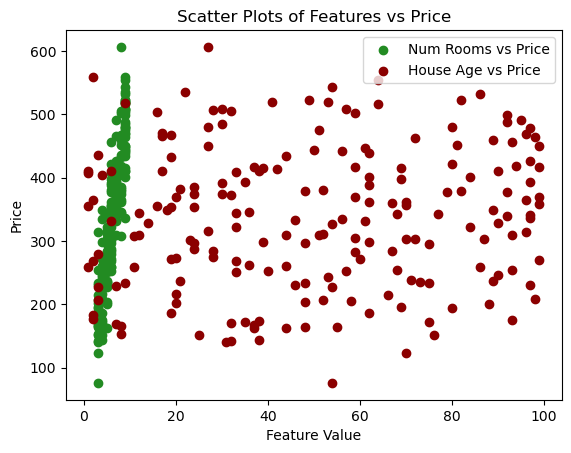

In [8]:
# Plot
plt.scatter(data['num_rooms'], data['price'], label='Num Rooms vs Price', color = 'forestgreen')
plt.scatter(data['house_age'], data['price'], label='House Age vs Price', color = 'darkred')
plt.xlabel('Feature Value')
plt.ylabel('Price')
plt.legend()
plt.title('Scatter Plots of Features vs Price')
plt.show()

In [9]:
# Splitting data into training and testing sets
X = data[['num_rooms', 'house_age']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Initialize and train AdaBoost Regressor model
model_ab = AdaBoostRegressor(n_estimators=100, random_state=42)
model_ab.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [11]:
# Predictions
predictions = model_ab.predict(X_test)

In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Squared Error: 3012.80
Root Mean Squared Error: 54.89


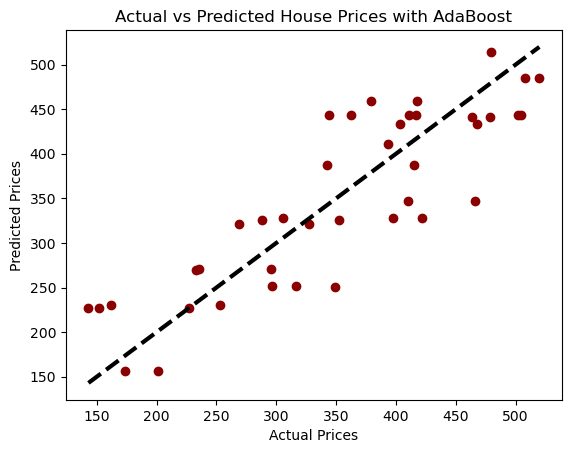

In [13]:
# Visualization: Actual vs Predicted Prices
plt.scatter(y_test, predictions, color = 'darkred')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices with AdaBoost')
plt.show()